<a href="https://colab.research.google.com/github/amballa-mahesh/Deep_learning_cancer_data_set_neural_network/blob/main/Cancer_data_set_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer

Loading and Reading Data

In [2]:
cancer_data = load_breast_cancer()

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame(cancer_data.data,columns= cancer_data.feature_names)

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Creating Pandas Profiling report

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

<ipython-input-6-4449040c81eb>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [8]:
profile = pp.ProfileReport(df)
profile.to_file('profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
columns = list(df.columns)
columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

# Dimentionality Reduction..

Find the columns which are highly corelated with other and droping them from dataframe

In [54]:
corr_columns = []
for i in range(0,29):
  for j in range(i,29):
    #print(columns[i],columns[j+1])
    corr_value = df[columns[i]].corr(df[columns[j+1]])
    # print(corr_value)
    if corr_value>=0.80:
      corr_columns.append(columns[j+1])
corr_columns = set(corr_columns) 

In [55]:
corr_columns

{'area error',
 'concavity error',
 'fractal dimension error',
 'mean area',
 'mean concave points',
 'mean concavity',
 'mean perimeter',
 'perimeter error',
 'worst area',
 'worst compactness',
 'worst concave points',
 'worst concavity',
 'worst fractal dimension',
 'worst perimeter',
 'worst radius',
 'worst smoothness',
 'worst texture'}

In [148]:
df_new = df.drop(corr_columns,axis =1)

In [149]:
df_new.columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension', 'radius error',
       'texture error', 'smoothness error', 'compactness error',
       'concave points error', 'symmetry error', 'worst symmetry'],
      dtype='object')

In [150]:
df_new.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364


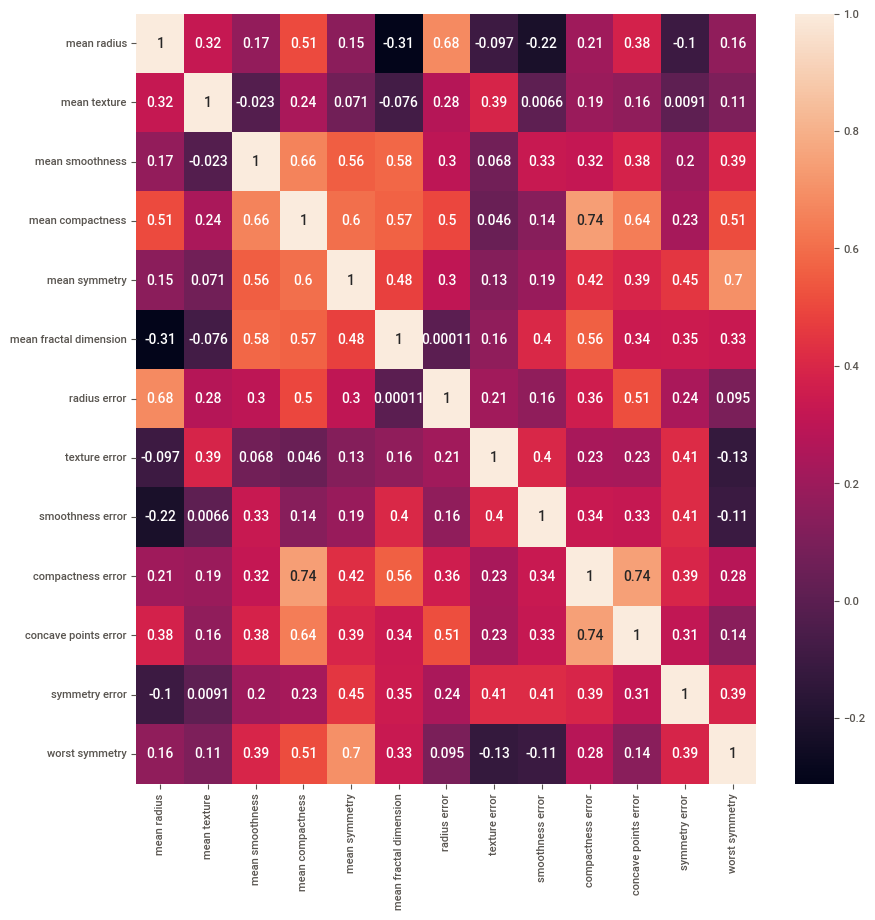

In [151]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

In [152]:
df_new.describe()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.181162,0.062798,0.405172,1.216853,0.007041,0.025478,0.011796,0.020542,0.290076
std,3.524049,4.301036,0.014064,0.052813,0.027414,0.007060,0.277313,0.551648,0.003003,0.017908,0.006170,0.008266,0.061867
min,6.981000,9.710000,0.052630,0.019380,0.106000,0.049960,0.111500,0.360200,0.001713,0.002252,0.000000,0.007882,0.156500
25%,11.700000,16.170000,0.086370,0.064920,0.161900,0.057700,0.232400,0.833900,0.005169,0.013080,0.007638,0.015160,0.250400
50%,13.370000,18.840000,0.095870,0.092630,0.179200,0.061540,0.324200,1.108000,0.006380,0.020450,0.010930,0.018730,0.282200
75%,15.780000,21.800000,0.105300,0.130400,0.195700,0.066120,0.478900,1.474000,0.008146,0.032450,0.014710,0.023480,0.317900
max,28.110000,39.280000,0.163400,0.345400,0.304000,0.097440,2.873000,4.885000,0.031130,0.135400,0.052790,0.078950,0.663800


Treating Outliers

In [153]:
for i in df_new.columns:
  q1 = np.percentile(df_new[i],25)
  q3 = np.percentile(df_new[i],75)
  iqr = q3- q1
  ll = q1 - (1.5*iqr)
  ul = q3 + (1.5*iqr)
  for j in range(0,df_new.shape[0]):
    if df_new.loc[j,i] < ll:
      df_new.loc[j,i] = ll
    if df_new.loc[j,i] > ul:
      df_new.loc[j,i] = ul
    if df_new.loc[j,i] == 0.0:
      df_new.loc[j,i] = q1

In [154]:
df_new.describe()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.062916,19.254736,0.096266,0.103222,0.180734,0.062604,0.384698,1.198057,0.006876,0.024561,0.011776,0.020047,0.287616
std,3.340025,4.187510,0.013685,0.049386,0.026067,0.006418,0.203612,0.485500,0.002410,0.014947,0.005230,0.006572,0.053868
min,6.981000,9.710000,0.057975,0.019380,0.111200,0.049960,0.111500,0.360200,0.001713,0.002252,0.001852,0.007882,0.156500
25%,11.700000,16.170000,0.086370,0.064920,0.161900,0.057700,0.232400,0.833900,0.005169,0.013080,0.007638,0.015160,0.250400
50%,13.370000,18.840000,0.095870,0.092630,0.179200,0.061540,0.324200,1.108000,0.006380,0.020450,0.010930,0.018730,0.282200
75%,15.780000,21.800000,0.105300,0.130400,0.195700,0.066120,0.478900,1.474000,0.008146,0.032450,0.014710,0.023480,0.317900
max,21.900000,30.245000,0.133695,0.228620,0.246400,0.078750,0.848650,2.434150,0.012612,0.061505,0.025318,0.035960,0.419150


<AxesSubplot: >

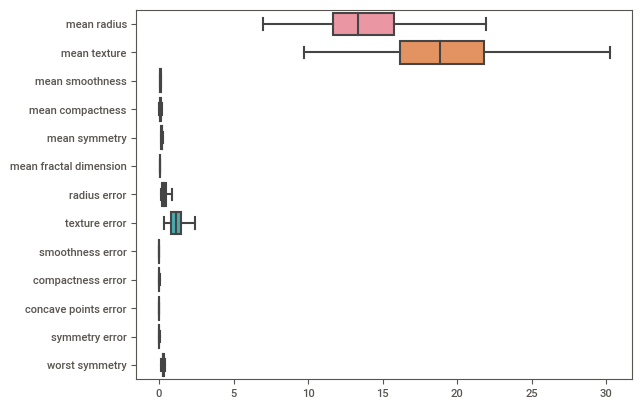

In [155]:
sns.boxplot(df_new,orient ='h')

Making the data as normally distributed data using boxcox transformation

In [157]:
import scipy
from scipy.stats import boxcox

In [158]:
for i in df_new.columns:
  data,_= boxcox(df_new[i])
  df_new[i] = data

Min max scaling

In [159]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [160]:
df_scaled = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(df_scaled,columns = df_new.columns)
df_scaled.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry
0,0.850590,0.053682,0.837202,1.000000,0.976685,0.999281,1.000000,0.440915,0.658420,0.917616,0.761022,0.905858,1.000000
1,0.953319,0.508515,0.420824,0.533259,0.612136,0.363679,0.816650,0.334177,0.556722,0.480601,0.682225,0.433087,0.561413
2,0.920240,0.668999,0.737005,0.837344,0.779271,0.502606,0.948555,0.369204,0.638493,0.845982,0.889945,0.742828,0.843557
3,0.471132,0.631062,1.000000,1.000000,1.000000,1.000000,0.776415,0.570256,0.836034,1.000000,0.840473,1.000000,1.000000
4,0.942995,0.322225,0.625023,0.755406,0.610050,0.456567,0.954767,0.365596,0.953006,0.680655,0.845284,0.589830,0.408001


<AxesSubplot: >

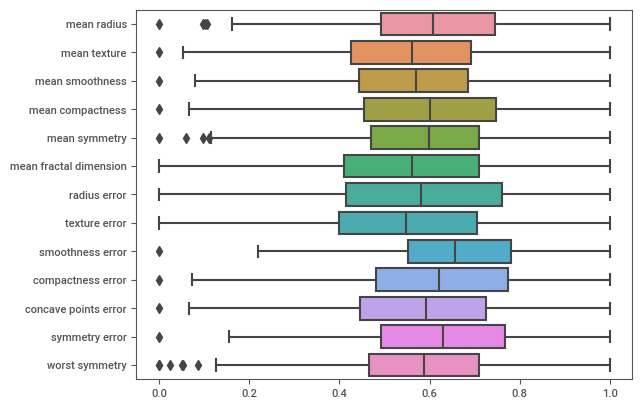

In [161]:
sns.boxplot(df_scaled,orient ='h')

In [162]:
df_scaled.describe()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.621773,0.562376,0.565893,0.604421,0.596158,0.567492,0.588091,0.553129,0.664969,0.627499,0.594035,0.631873,0.591182
std,0.195496,0.194475,0.174676,0.203004,0.180746,0.212274,0.238778,0.220159,0.173376,0.200529,0.195011,0.195144,0.190757
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.492637,0.425740,0.443346,0.455196,0.470505,0.409194,0.413733,0.398671,0.551319,0.480601,0.446770,0.493008,0.466115
50%,0.608435,0.560462,0.569204,0.601273,0.598166,0.560346,0.580550,0.547420,0.656927,0.620408,0.592369,0.630858,0.587836
75%,0.746202,0.692319,0.686060,0.747452,0.709097,0.709192,0.761259,0.704418,0.779743,0.773261,0.725185,0.767898,0.710412
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [163]:
df.shape,df_scaled.shape

((569, 30), (569, 13))

In [165]:
profile = pp.ProfileReport(df_scaled)
profile.to_file('profile_scaled.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

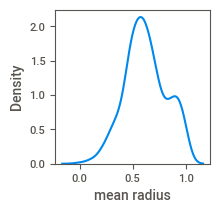

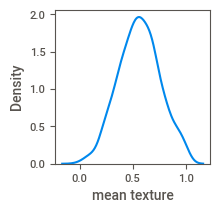

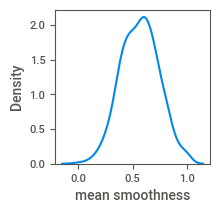

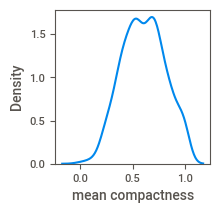

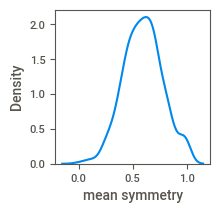

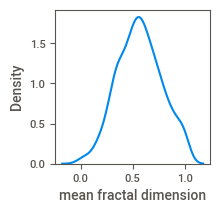

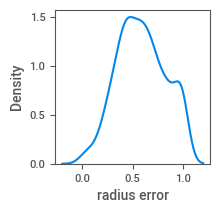

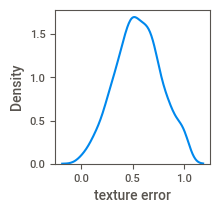

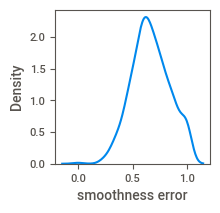

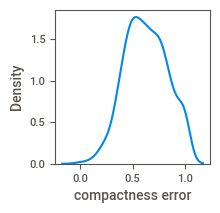

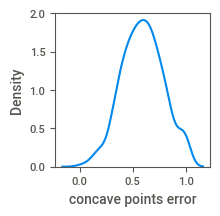

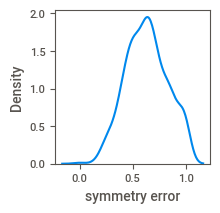

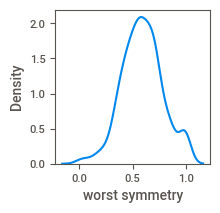

In [176]:
for i in df_scaled.columns:
  plt.figure(figsize = (2,2))
  sns.kdeplot(df_scaled[i])
  plt.plot() 


In [182]:
x = df_scaled

In [179]:
y  = pd.DataFrame(cancer_data.target, columns = ['result'])
y.head()

,result
0,0
1,0
2,0
3,0
4,0


Spliting the data

In [180]:
from sklearn.model_selection import train_test_split

In [185]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,stratify = y, random_state = 123)

Creation of neural network

In [187]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [232]:
model = Sequential()
model.add(Dense(df_scaled.shape[1],activation = 'leaky_relu', input_shape = [x.shape[1],]))
model.add(Dropout(rate = 0.2))
model.add(Dense(5,activation = 'leaky_relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(5,activation = 'leaky_relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(1, activation  = 'sigmoid'))


In [233]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 13)                182       
                                                                 
 dropout_5 (Dropout)         (None, 13)                0         
                                                                 
 dense_9 (Dense)             (None, 5)                 70        
                                                                 
 dropout_6 (Dropout)         (None, 5)                 0         
                                                                 
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dropout_7 (Dropout)         (None, 5)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [234]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics ='accuracy' )

In [236]:
history = model.fit(x_train,y_train,epochs = 200,validation_data = (x_test,y_test))

Epoch 1/200
15/15 [==============================] - 0s 9ms/step - loss: 0.1311 - accuracy: 0.9516 - val_loss: 0.1215 - val_accuracy: 0.9386
Epoch 2/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1137 - accuracy: 0.9670 - val_loss: 0.1219 - val_accuracy: 0.9386
Epoch 3/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1117 - accuracy: 0.9516 - val_loss: 0.1256 - val_accuracy: 0.9386
Epoch 4/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1232 - accuracy: 0.9604 - val_loss: 0.1248 - val_accuracy: 0.9386
Epoch 5/200
15/15 [==============================] - 0s 4ms/step - loss: 0.1207 - accuracy: 0.9582 - val_loss: 0.1247 - val_accuracy: 0.9386
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1196 - accuracy: 0.9648 - val_loss: 0.1289 - val_accuracy: 0.9386
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1435 - accuracy: 0.9473 - val_loss: 0.1224 - val_accuracy: 0.9474
Epoch 8/200
1

<function matplotlib.pyplot.show(close=None, block=None)>

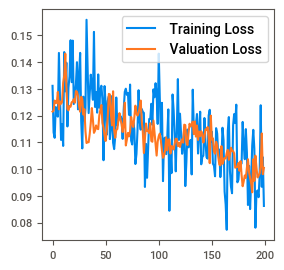

In [237]:
plt.figure(figsize = (3,3))
plt.plot(history.history['loss'], label = ' Training Loss')
plt.plot(history.history['val_loss'], label = ' Valuation Loss')
plt.legend( )
plt.show

In [238]:
y_pred = np.round(model.predict(x_test),0)

4/4 [==============================] - 0s 3ms/step


Results and Accuracy understanding of the model

In [208]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [239]:
print(confusion_matrix(y_test,y_pred))

[[42  0]
 [ 3 69]]


In [240]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        42
           1       1.00      0.96      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



In [241]:
print(accuracy_score(y_test,y_pred))

0.9736842105263158
